## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數，momentum設定與範例不同
在修正方向上，增加動量，如牛頓定律一樣，
增加動量有機會讓卡在局部最小值的狀態跳離
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.70

In [8]:
results = {}

"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
使用迴圈，建立不同 Learning rate 的模型並訓練
作業：比較使用nesterov 與否的表現，範例為True，我們第一次的練習先用True看看
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 7s 147us/step - loss: 0.7374 - accuracy: 0.7335 - val_loss: 1.8099 - val_accuracy: 0.5006
Epoch 50/50
50000/50000 [==============================] - 7s 148us/step - loss: 0.7123 - accuracy: 0.7424 - val_loss: 2.0208 - val_accuracy: 0.4750
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.8780 - accuracy: 0.6906 - val_loss: 1.3875 - val_accuracy: 0.5360
Epoch 48/50
50000/50000 [==============================] - 8s 153us/step - loss: 0.8609 - accuracy: 0.6972 - val_loss: 1.4543 - val_accuracy: 0.5193
Epoch 49/50
50000/50000 [==============================] - 7s 150us/step - loss: 0.8590 - accuracy: 0.6981 - val_loss: 1.8423 - val_accuracy: 0.4729
Epoch 50/50
50000/50000 [==============================] - 7s 146us/step - loss: 0.8419 - accuracy: 0.7067 - val_loss: 1.5032 - val_accuracy: 0.5039
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4559 - accuracy: 0.4926 - val_loss: 1.4903 - val_accuracy: 0.4778
Epoch 46/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4510 - accuracy: 0.4949 - val_loss: 1.5034 - val_accuracy: 0.4715
Epoch 47/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4458 - accuracy: 0.4962 - val_loss: 1.4985 - val_accuracy: 0.4738
Epoch 48/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.4406 - accuracy: 0.4984 - val_loss: 1.4802 - val_accuracy: 0.4830
Epoch 49/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.4351 - accuracy: 0.4998 - val_loss: 1.4776 - val_accuracy: 0.4791
Epoch 50/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.4301 - accuracy: 0.5009 - val_loss: 1.4877 - val_accuracy: 0.4712
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8631 - accuracy: 0.3547 - val_loss: 1.8667 - val_accuracy: 0.3556
Epoch 44/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.8594 - accuracy: 0.3560 - val_loss: 1.8631 - val_accuracy: 0.3568
Epoch 45/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8559 - accuracy: 0.3567 - val_loss: 1.8595 - val_accuracy: 0.3570
Epoch 46/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.8524 - accuracy: 0.3578 - val_loss: 1.8562 - val_accuracy: 0.3586
Epoch 47/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.8491 - accuracy: 0.3588 - val_loss: 1.8529 - val_accuracy: 0.3591
Epoch 48/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8459 - accuracy: 0.3601 - val_loss: 1.8496 - val_accuracy: 0.3586
Epoch 49/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.8427 - accuracy: 0.3600

Epoch 41/50
50000/50000 [==============================] - 8s 158us/step - loss: 2.1964 - accuracy: 0.2276 - val_loss: 2.1937 - val_accuracy: 0.2333
Epoch 42/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.1943 - accuracy: 0.2284 - val_loss: 2.1916 - val_accuracy: 0.2344
Epoch 43/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.1921 - accuracy: 0.2295 - val_loss: 2.1895 - val_accuracy: 0.2346
Epoch 44/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.1901 - accuracy: 0.2309 - val_loss: 2.1875 - val_accuracy: 0.2352
Epoch 45/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.1880 - accuracy: 0.2322 - val_loss: 2.1854 - val_accuracy: 0.2363
Epoch 46/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.1859 - accuracy: 0.2330 - val_loss: 2.1834 - val_accuracy: 0.2382
Epoch 47/50
50000/50000 [==============================] - 7s 150us/step - loss: 2.1839 - accuracy: 0.2344

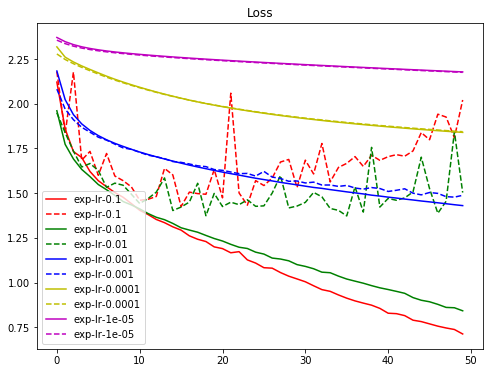

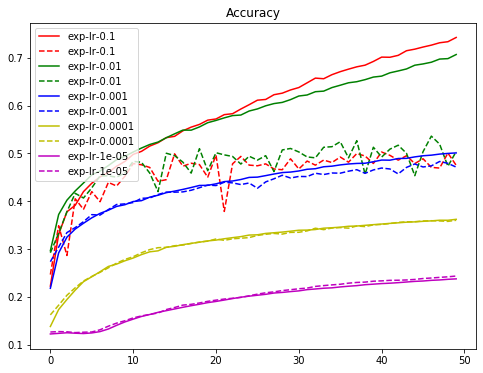

In [9]:
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
'''
取上面LEARNING_RATE比較好的表現，將MOMENTUM改為0.99
作業：比較使用nesterov 與否的表現，現在練習False看結果
結果是準確率大幅下降～～loss提高 ＝ ＝+
'''

In [10]:
"""
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.99

In [13]:
"""
撰寫你的訓練流程並將結果用 dictionary 紀錄
使用迴圈，建立不同 Learning rate 的模型並訓練
"""

results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 6s 118us/step - loss: 2.3111 - accuracy: 0.0986 - val_loss: 2.3120 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.3114 - accuracy: 0.0987 - val_loss: 2.3189 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.3136 - accuracy: 0.0983 - val_loss: 2.3129 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

50000/50000 [==============================] - 6s 123us/step - loss: 1.3249 - accuracy: 0.5256 - val_loss: 1.5622 - val_accuracy: 0.4669
Epoch 46/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.3006 - accuracy: 0.5345 - val_loss: 1.5299 - val_accuracy: 0.4837
Epoch 47/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.3142 - accuracy: 0.5314 - val_loss: 1.5751 - val_accuracy: 0.4510
Epoch 48/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.3312 - accuracy: 0.5247 - val_loss: 1.5397 - val_accuracy: 0.4679
Epoch 49/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.2995 - accuracy: 0.5363 - val_loss: 1.5698 - val_accuracy: 0.4563
Epoch 50/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.3029 - accuracy: 0.5363 - val_loss: 1.5788 - val_accuracy: 0.4620


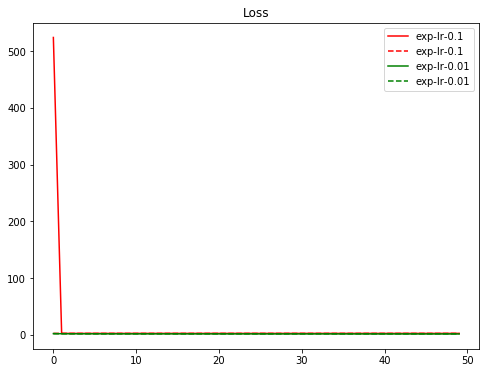

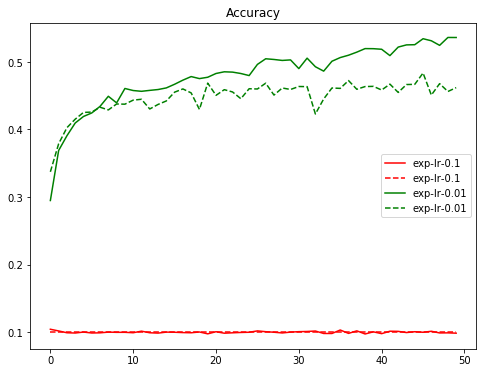

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()